<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/5_Aprendizaje_supervisado/2_Regresion_Polinomica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# ⚖️ **Regresión Polinómica, Subajuste, Sobreajuste y Regularización**

**Objetivos de Aprendizaje**

Al finalizar este notebook, los estudiantes serás capaz de:

1. **Entrenar modelos de Regresión Polinómica.**
2.  **Entender los problemas de `underfitting` y `overfitting`** y el Trade-off entre Sesgo y Varianza.
3.  **Implementar la Regularización (Ridge y Lasso)** como una técnica fundamental para controlar la complejidad del modelo y mejorar su capacidad de generalización.

## Importar Librerías

In [1]:
# Importación de librerías estándar
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importación de herramientas de scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

## Mejorar visualización de dataframes y gráficos

In [2]:
# Que muestre todas las columnas
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Configuraciones para una mejor visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## Cargar datos

In [3]:
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/2025_ii_curso_ia_economia/datasets'

In [6]:
# Para establecer el directorio de los archivos
os.chdir(path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/2025_ii_curso_ia_economia/datasets'

In [7]:
df = pd.read_csv('Salary_Data.csv')
print(df.shape)
df.head()

(6704, 6)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.00,Male,Bachelor's,Software Engineer,5.00,"90,000.00"
1,28.00,Female,Master's,Data Analyst,3.00,"65,000.00"
2,45.00,Male,PhD,Senior Manager,15.00,"150,000.00"
3,36.00,Female,Bachelor's,Sales Associate,7.00,"60,000.00"
4,52.00,Male,Master's,Director,20.00,"200,000.00"


## Limpieza de Datos

Inspeccionamos los tipos de datos y los valores nulos, tal como se haría en un proyecto real (y como se hace en el notebook de referencia).

In [8]:
print("Información del DataFrame:")
df.info()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [9]:
print("\nValores Nulos por Columna:")
print(df.isnull().sum())


Valores Nulos por Columna:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [10]:
print(df.isnull().sum()/len(df)*100)

Age                   0.03
Gender                0.03
Education Level       0.04
Job Title             0.03
Years of Experience   0.04
Salary                0.07
dtype: float64


Vemos que hay los valores nulos son muy pocos, por lo que vamos a eliminarlos, ya que esto no afectará significativamente al modelo.

In [11]:
# Eliminamos las filas con cualquier valor nulo
df.dropna(inplace=True)

print("Valores Nulos después de la limpieza:")
print(df.isnull().sum().sum()) # .sum().sum() da el total de nulos en todo el DataFrame

Valores Nulos después de la limpieza:
0


## Enfoque Pedagógico

El dataset tiene múltiples variables (categóricas y numéricas). Un modelo completo requeriría *One-Hot Encoding* o *Label Encoding* para `Gender`, `Education Level` y `Job Title`.

**Sin embargo, para el objetivo de *esta clase* (entender el sobreajuste visualmente),** hacer todo ese preprocesamiento introduce demasiada complejidad que distrae del punto principal.

Nos enfocaremos en la relación económica más clásica: **Teoría del Capital Humano**, que postula que el salario (`Salary`) es una función de la experiencia (`Years of Experience`). Esto nos permite modelar y visualizar el problema en 2D de forma muy clara.

## División del Conjunto de Datos

Primero, seleccionamos nuestras variables `X` e `y`. Luego, dividimos los datos. **El EDA se debe hacer *después* de la división y *solo* sobre los datos de entrenamiento**, para evitar contaminar nuestro análisis con información del conjunto de prueba (lo que se conoce como *data leakage* o fuga de datos).

In [12]:
# 1. Seleccionar las variables de interés
X = df[['Years of Experience']]
y = df['Salary']

# 2. Dividir en conjuntos de entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamaño del set de Entrenamiento: {X_train.shape[0]} observaciones")
print(f"Tamaño del set de Prueba: {X_test.shape[0]} observaciones")

Tamaño del set de Entrenamiento: 4688 observaciones
Tamaño del set de Prueba: 2010 observaciones


In [13]:
X_train.head()

,Years of Experience
4092,16.00
2180,6.00
5224,1.00
459,5.00
6118,16.00


In [14]:
y_train.head()

,Salary
4092,"160,000.00"
2180,"115,000.00"
5224,"55,000.00"
459,"145,000.00"
6118,"215,000.00"


## **Análisis Exploratorio de Datos (EDA) sobre Datos de Entrenamiento**

Ahora, exploremos *únicamente* los datos de `(X_train, y_train)`.

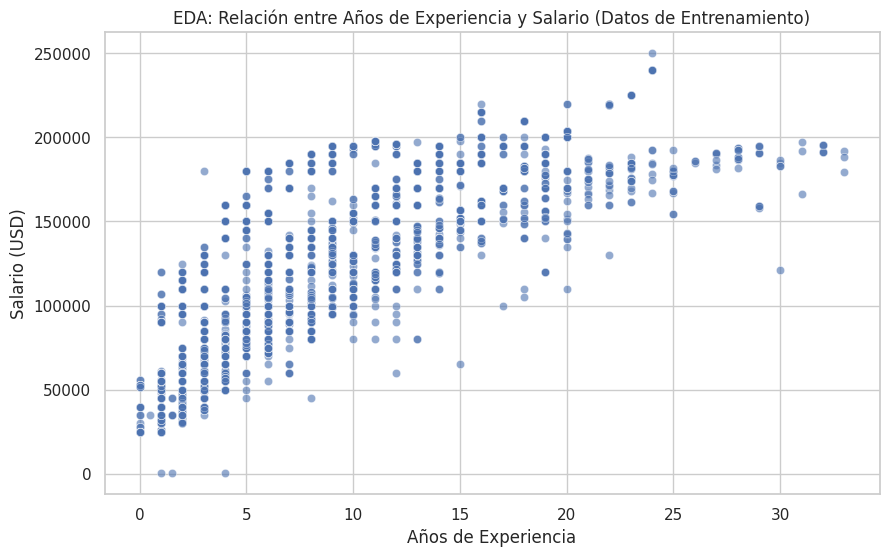

In [15]:
# 1. Relación entre Experiencia y Salario
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['Years of Experience'], y=y_train, alpha=0.6)
plt.title('EDA: Relación entre Años de Experiencia y Salario (Datos de Entrenamiento)')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario (USD)')
plt.show()

**Interpretación del EDA:**

Observamos una relación positiva muy fuerte: a más experiencia, mayor salario. Sin embargo, la nube de puntos parece curvarse ligeramente a medida que aumenta la experiencia. Esto sugiere que un modelo lineal simple (una sola recta) no es adecuado. La teoría económica (rendimientos marginales de la experiencia) apoyaría la idea de que la relación no es perfectamente lineal.

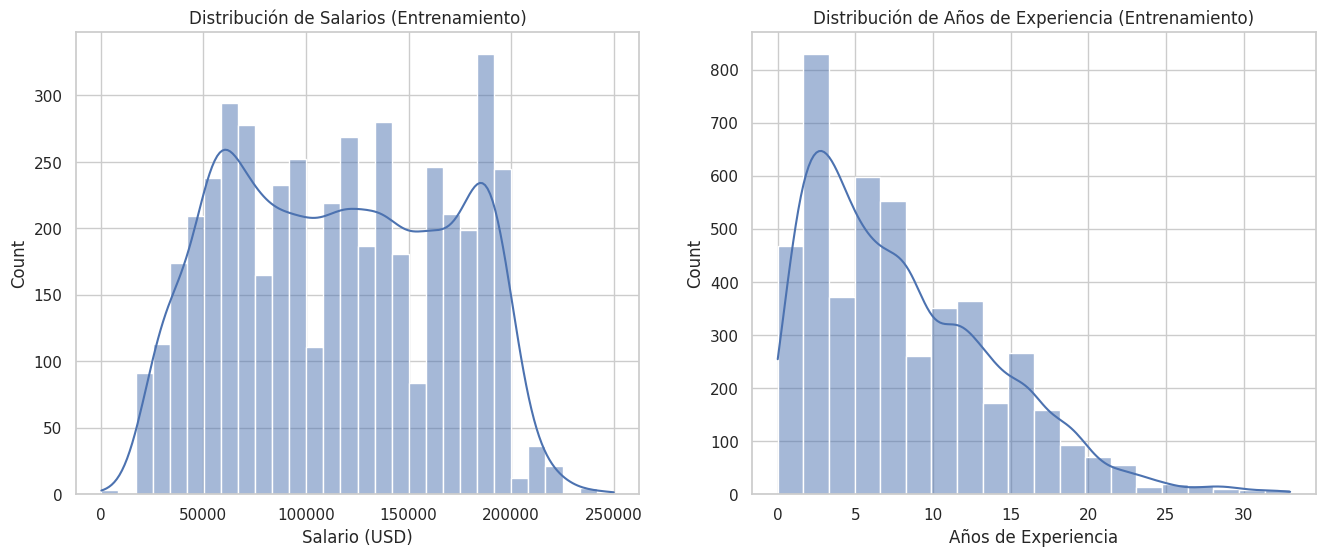

In [16]:
# 2. Distribución de las variables
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(y_train, kde=True, ax=axes[0], bins=30)
axes[0].set_title('Distribución de Salarios (Entrenamiento)')
axes[0].set_xlabel('Salario (USD)')

sns.histplot(X_train['Years of Experience'], kde=True, ax=axes[1], bins=20)
axes[1].set_title('Distribución de Años de Experiencia (Entrenamiento)')
axes[1].set_xlabel('Años de Experiencia')

plt.show()

## Modelo 1 - Subajuste (Underfitting)

Comencemos con el modelo más simple posible: una regresión lineal simple.

In [17]:
# Creación y entrenamiento del modelo lineal simple
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

# Predicciones
y_train_pred_simple = model_simple.predict(X_train)
y_test_pred_simple = model_simple.predict(X_test)

# Cálculo del error (RMSE - Root Mean Squared Error)
# Usamos RMSE para que el error esté en las mismas unidades que el salario (USD)
rmse_train_simple = np.sqrt(mean_squared_error(y_train, y_train_pred_simple))
rmse_test_simple = np.sqrt(mean_squared_error(y_test, y_test_pred_simple))

print(f"RMSE en Entrenamiento (Lineal): ${rmse_train_simple:,.2f}")
print(f"RMSE en Prueba (Lineal): ${rmse_test_simple:,.2f}")

RMSE en Entrenamiento (Lineal): $30,743.12
RMSE en Prueba (Lineal): $31,694.41


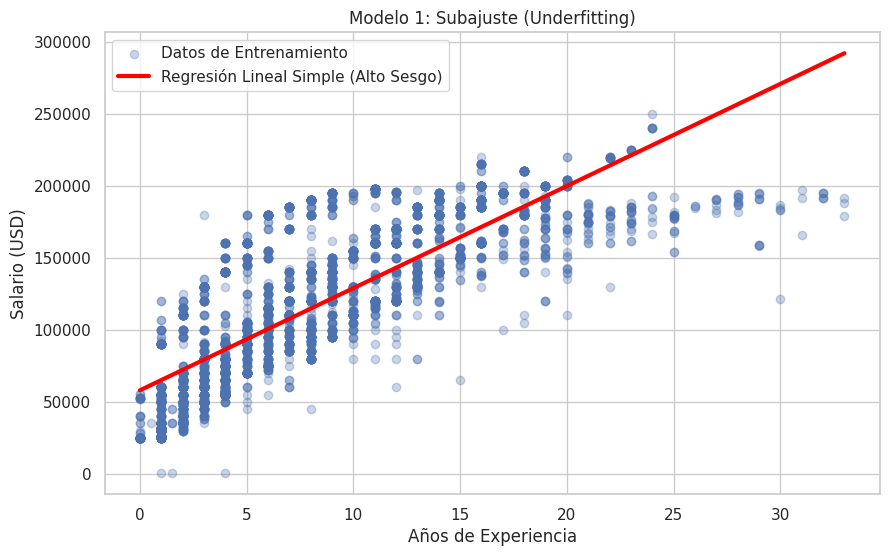

In [18]:
# Visualización del modelo de Subajuste

# Dibujar una línea de regresión suave y continua
# Para la línea, creamos puntos ordenados de X
X_plot = np.linspace(X_train.min(), X_train.max(), 100)
y_plot_simple = model_simple.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.3, label='Datos de Entrenamiento')
plt.plot(X_plot, y_plot_simple, color='red', linewidth=3, label='Regresión Lineal Simple (Alto Sesgo)')
plt.title('Modelo 1: Subajuste (Underfitting)')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario (USD)')
plt.legend()
plt.show()

**Interpretación:**

El modelo lineal captura la tendencia general, pero podemos ver visualmente que **sobrestima** sistemáticamente los salarios para empleados con más de 20 años de experiencia.

## Modelo 2 - Sobreajuste (Overfitting)

Ahora, vamos al extremo opuesto. Crearemos un modelo extremadamente flexible (un polinomio de grado 25) que "memorizará" los datos.

In [19]:
# Creamos un pipeline para automatizar los pasos:
# 1. Crear características polinómicas de grado 25
# 2. Escalar las características (Explicado arriba)
# 3. Ajustar un modelo lineal a esas características

pipeline_poly = Pipeline([
    ("poly_features", PolynomialFeatures(degree=25, include_bias=False)),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipeline_poly.fit(X_train, y_train)

# Predicciones y error
y_train_pred_poly = pipeline_poly.predict(X_train)
y_test_pred_poly = pipeline_poly.predict(X_test)

rmse_train_poly = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
rmse_test_poly = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))

print(f"RMSE en Entrenamiento (Poli-25): ${rmse_train_poly:,.2f} <-- ¡El error de entrenamiento bajó!")
print(f"RMSE en Prueba (Poli-25): ${rmse_test_poly:,.2f} <-- ¡¡El error de prueba aumentó considerablemente!!")

RMSE en Entrenamiento (Poli-25): $26,846.81 <-- ¡El error de entrenamiento bajó!
RMSE en Prueba (Poli-25): $135,669.00 <-- ¡¡El error de prueba aumentó considerablemente!!


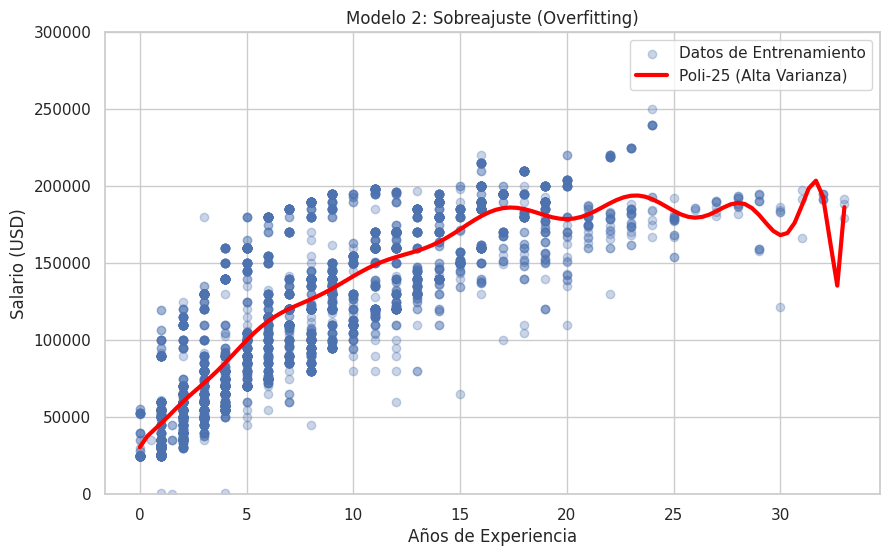

In [20]:
# Visualización del modelo de Sobreajuste

# Para visualizar la curva, usamos los puntos X ordenados
y_plot_poly = pipeline_poly.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.3, label='Datos de Entrenamiento')
plt.plot(X_plot, y_plot_poly, color='red', linewidth=3, label='Poli-25 (Alta Varianza)')
plt.title('Modelo 2: Sobreajuste (Overfitting)')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario (USD)')
plt.legend()
plt.ylim(0, 300000) # Establecemos un límite en el eje Y
plt.show()

**Interpretación:**

¡Miren el desastre! La curva se vuelve loca, tratando de pasar por cada punto. El RMSE de entrenamiento es más bajo que el del modelo lineal (~$27.000), lo que indica que es "mejor" para describir los datos que ya vio.

Sin embargo, la curva se vuelve **errática** y al enfrentarse a los datos de prueba, el error aumenta bastante (~$135.000). Este modelo **memorizó el ruido**, no el patrón subyacente.

## La Solución - Regularización (Ridge y Lasso)

La regularización es una técnica que penaliza al modelo por ser demasiado complejo. Funciona modificando la "función de costos" del modelo (la fórmula que intenta minimizar).

Regresión Lineal (OLS): Su objetivo es simple, encontrar los coeficientes ($\beta$) que minimicen el Error Cuadrático Medio (MSE).

Costo = Error

Regresión Lineal Regularizada: Su objetivo es un balance. Quiere minimizar el error, pero también quiere minimizar la complejidad. Para ello, le añadimos un "impuesto a la complejidad".

Costo = Error + Penalización

El modelo ahora tiene que justificar cada coeficiente. Un coeficiente solo puede ser grande si logra una reducción importante en el MSE que "pague" el costo de su propia penalización.

Hay dos tipos principales de penalización que dan lugar a dos modelos: Ridge (L2) y Lasso (L1).

1. **Regresión Ridge (Penalización L2)**

La Regresión Ridge suaviza los coeficientes ($\beta$).

- *Cómo funciona:*

Añade una penalización proporcional al cuadrado de la magnitud de cada coeficiente.

Penalización Ridge (L2) = α * Σ(β²)

- *El Resultado:*

La penalización al cuadrado castiga de forma exponencial los coeficientes muy grandes. Si un coeficiente ($\beta$) intenta crecer de 5 a 10:El error (MSE) puede bajar un poco, pero su penalización sube de $5^2=25$ a $10^2=100$.

El modelo rápidamente aprende que "no vale la pena" tener coeficientes tan grandes y los encoge a todos para encontrar un balance.

- *Efecto Clave:*

Ridge hace que los coeficientes sean pequeños. Simplemente los suaviza, "domando" la curva errática que vimos. Es útil si hay problemas de multicolinealidad, puesto que Ridge tiende a encoger los coeficientes de todas las variables correlacionadas de manera similar, repartiendo su efecto.

2. **Regresión Lasso (Penalización L1)**

Lasso es un "selector de variables".

- *Cómo funciona:*

Añade una penalización proporcional al valor absoluto de cada coeficiente.

Penalización Lasso (L1) = α * Σ(|β|)

- *El Resultado:*

La penalización por el valor absoluto tiene una propiedad matemática asombrosa. A medida que aumenta la fuerza de la penalización (alpha), el modelo descubre que la mejor manera de minimizar el costo total es eliminar por completo los coeficientes de las variables menos importantes, llevándolos exactamente a cero.

- *Efecto Clave:*

Lasso realiza una selección automática de variables. Le das 25 características polinómicas (ruidosas) y te dice: "He analizado todas, y la verdad es que 20 de ellas son inútiles (cero), así que me quedo solo con las 5 que realmente importan".

Algoritmos donde se utilizan Ridge (L2) y Lasso (L1):
- Regresión lineal
- Regresión polinómica
- Regresión Logística
- Redes neuronales
- Máquinas de Soporte Vectorial (SVM)

**¿Cómo determino el valor de alpha al aplicar Ridge y Lasso?**

No hay una regla que seguir, ni se debe adivinar. Para encontrar el alpha óptimo se usan técnicas como la Validación Cruzada (Cross-Validation), que veremos más adelante, para probar un rango de valores (ej. 0.1, 1, 10, 100, 1000) y encontrar el alpha que da el menor error en datos de prueba.

**¿Por qué Estandarizar (`StandardScaler`) al utilizar Ridge y Lasso?**

Al utilizar `PolynomialFeatures(degree=25)` se crean nuevas variables: `Experiencia^2`, `Experiencia^3`, `Experiencia^4`, ... `Experiencia^25`.

Pensemos en un empleado con 10 años de experiencia:
* `Experiencia` = 10
* `Experiencia^2` = 100
* `Experiencia^15` = 10,000,000,000,000,000,000,000,000

Las escalas de nuestras variables son **drásticamente diferentes**. Un modelo de regresión (incluyendo Ridge y Lasso) penaliza la **magnitud de los coeficientes**.

Si no estandarizamos, el modelo penalizará injustamente a las variables de menor grado (como `Experiencia`) y tendrá problemas numéricos con las de grado alto.

**Recomendación: Siempre que uses regularización o características polinómicas, DEBES estandarizar (escalar) tus datos primero.**

Ahora vamos a "curar" el sobreajuste. Usaremos el mismo modelo polinómico de grado 25, pero cambiaremos `LinearRegression` por `Ridge` y `Lasso`.

## Modelo 3: Regresión Ridge (Penalización L2)

Ridge (L2) añade una penalización por los coeficientes *al cuadrado*. "Encoge" los coeficientes de las variables ruidosas, pero no los lleva a cero.

In [21]:
# Creamos un pipeline con Regresión Ridge
# alpha es la fuerza de la penalización. Empecemos con un valor de 10.

pipeline_ridge = Pipeline([
    ("poly_features", PolynomialFeatures(degree=25, include_bias=False)),
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=10))
])

pipeline_ridge.fit(X_train, y_train)

# Predicciones y error
y_train_pred_ridge = pipeline_ridge.predict(X_train)
y_test_pred_ridge = pipeline_ridge.predict(X_test)

rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

print(f"RMSE Entrenamiento (Ridge): ${rmse_train_ridge:,.2f}")
print(f"RMSE Prueba (Poli-25): ${rmse_test_poly:,.2f} (El modelo sobreajustado)")
print(f"RMSE Prueba (Ridge): ${rmse_test_ridge:,.2f} <-- ¡¡Gran mejora!!")

RMSE Entrenamiento (Ridge): $27,052.09
RMSE Prueba (Poli-25): $135,669.00 (El modelo sobreajustado)
RMSE Prueba (Ridge): $27,462.71 <-- ¡¡Gran mejora!!


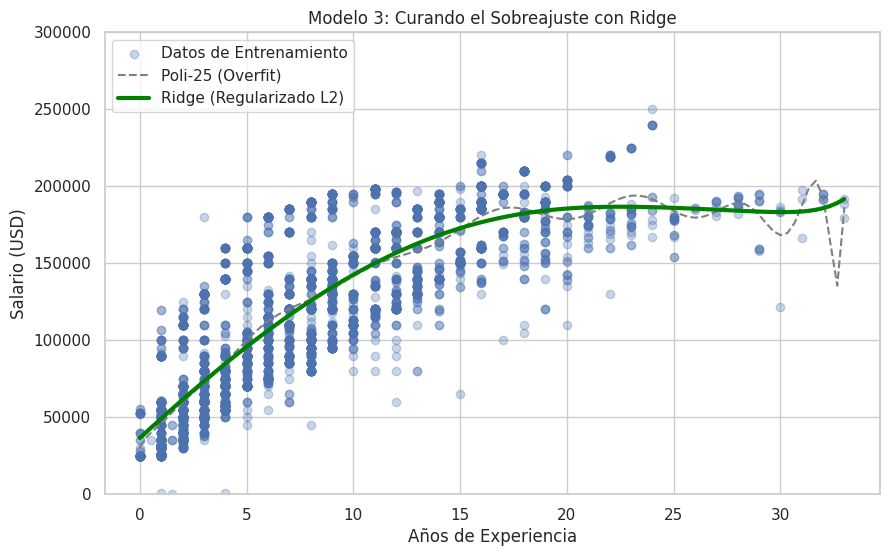

In [22]:
# Visualización del modelo Ridge
y_plot_ridge = pipeline_ridge.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.3, label='Datos de Entrenamiento')
plt.plot(X_plot, y_plot_poly, color='gray', linestyle='--', label='Poli-25 (Overfit)')
plt.plot(X_plot, y_plot_ridge, color='green', linewidth=3, label='Ridge (Regularizado L2)')
plt.title('Modelo 3: Curando el Sobreajuste con Ridge')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario (USD)')
plt.legend()
plt.ylim(0, 300000)
plt.show()

**Interpretación:** ¡Miren la diferencia! La curva de Ridge (verde) es **flexible** (captura la no linealidad mejor que la recta) pero **suave** y **creíble**.

La penalización L2 "domó" la complejidad. El RMSE de entrenamiento subió un poco (lo cual es bueno, dejó de memorizar), pero el RMSE de prueba **bajó drásticamente**. El modelo ahora generaliza.

## Modelo 4: Regresión Lasso (Penalización L1) y Selección de Variables

Lasso (L1) añade una penalización por el *valor absoluto* de los coeficientes. Su superpoder es que puede llevar coeficientes irrelevantes **exactamente a cero**.

In [23]:
# Creamos un pipeline con Regresión Lasso
# Los salarios son números grandes, por lo que el error es grande. Necesitamos un alpha grande.
# Probemos con alpha=500. Aumentamos max_iter para asegurar que converja.

pipeline_lasso = Pipeline([
    ("poly_features", PolynomialFeatures(degree=25, include_bias=False)),
    ("scaler", StandardScaler()),
    ("model", Lasso(alpha=500, max_iter=10000))
])

pipeline_lasso.fit(X_train, y_train)

# Predicciones y error
y_train_pred_lasso = pipeline_lasso.predict(X_train)
y_test_pred_lasso = pipeline_lasso.predict(X_test)

rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

print(f"RMSE Entrenamiento (Lasso): ${rmse_train_lasso:,.2f}")
print(f"RMSE Prueba (Ridge): ${rmse_test_ridge:,.2f} <-- ¡El mejor resultado hasta ahora!")
print(f"RMSE Prueba (Lasso): ${rmse_test_lasso:,.2f}")

RMSE Entrenamiento (Lasso): $27,390.74
RMSE Prueba (Ridge): $27,462.71 <-- ¡El mejor resultado hasta ahora!
RMSE Prueba (Lasso): $27,885.36


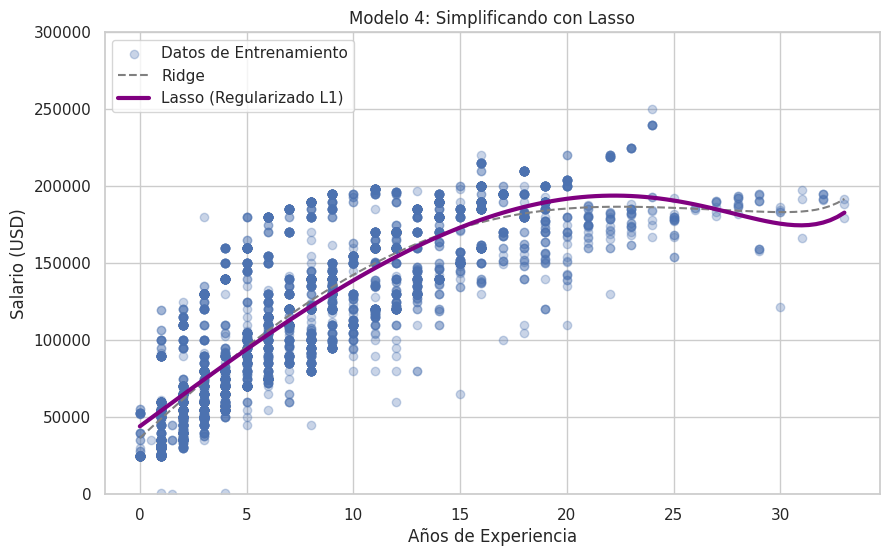

In [24]:
# Visualización del modelo Lasso
y_plot_lasso = pipeline_lasso.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.3, label='Datos de Entrenamiento')
plt.plot(X_plot, y_plot_ridge, color='gray', linestyle='--', label='Ridge')
plt.plot(X_plot, y_plot_lasso, color='purple', linewidth=3, label='Lasso (Regularizado L1)')
plt.title('Modelo 4: Simplificando con Lasso')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario (USD)')
plt.legend()
plt.ylim(0, 300000)
plt.show()

### La Magia de Lasso: Selección de Variables

Veamos los coeficientes que Lasso ha aprendido. Recuerden que partimos de un modelo con 25 características (`Exp^1`, `Exp^2`, ..., `Exp^25`).

In [25]:
# Extraemos los coeficientes del modelo Lasso en el pipeline
coefs_lasso = pipeline_lasso.named_steps['model'].coef_

num_total_coeffs = len(coefs_lasso)
num_zero_coeffs = np.sum(coefs_lasso == 0)

print(f"Número total de coeficientes (características polinómicas): {num_total_coeffs}")
print(f"Número de coeficientes llevados a CERO por Lasso: {num_zero_coeffs}")
print(f"Número de coeficientes CONSERVADOS: {num_total_coeffs - num_zero_coeffs}")

print("\n--- Valor de los Coeficientes ---")
print(coefs_lasso)

Número total de coeficientes (características polinómicas): 25
Número de coeficientes llevados a CERO por Lasso: 20
Número de coeficientes CONSERVADOS: 5

--- Valor de los Coeficientes ---
[ 61144.71822362     -0.         -23823.84933956     -0.
     -0.              0.              0.              0.
      0.              0.              0.              0.
   1002.31431869    762.82865191    294.35327078      0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.        ]


**Interpretación:**

¡Este es el resultado clave! De las 25 características polinómicas que le dimos, Lasso decidió que muchas (ej. 20 de 25) eran "ruido" y las **eliminó por completo** (llevando sus coeficientes a cero).

Actuó como un **método automático de selección de variables**, dándonos un modelo más simple e interpretable (más **parsimonioso**) y con mejor rendimiento predictivo.

## Conclusiones y Resumen Comparativo

Pongamos todos nuestros resultados en una tabla para ver la historia completa.

In [26]:
# Creando un DataFrame para comparar los errores (RMSE)
results = pd.DataFrame({
    'Modelo': [
        '1. Lineal Simple (Subajuste)',
        '2. Polinómico Grado 25 (Sobreajuste)',
        '3. Ridge (Regularizado L2)',
        '4. Lasso (Regularizado L1)'
    ],
    'RMSE en Entrenamiento': [
        rmse_train_simple,
        rmse_train_poly,
        rmse_train_ridge,
        rmse_train_lasso
    ],
    'RMSE en Prueba': [
        rmse_test_simple,
        rmse_test_poly,
        rmse_test_ridge,
        rmse_test_lasso
    ]
})

results_sorted = results.sort_values(by='RMSE en Prueba')

print("Tabla Comparativa de Rendimiento (Error en Dólares)")
display(results_sorted.style.format({
    'RMSE en Entrenamiento': '${:,.2f}',
    'RMSE en Prueba': '${:,.2f}'
}).background_gradient(cmap='Reds', subset=['RMSE en Prueba']))

Tabla Comparativa de Rendimiento (Error en Dólares)


,Modelo,RMSE en Entrenamiento,RMSE en Prueba
2,3. Ridge (Regularizado L2),"$27,052.09","$27,462.71"
3,4. Lasso (Regularizado L1),"$27,390.74","$27,885.36"
0,1. Lineal Simple (Subajuste),"$30,743.12","$31,694.41"
1,2. Polinómico Grado 25 (Sobreajuste),"$26,846.81","$135,669.00"


1.  **Subajuste (Modelo 1):** Es demasiado simple. Falla en capturar el patrón y tiene un error mediocre tanto en entrenamiento como en prueba (RMSE ~$31.000).
2.  **Sobreajuste (Modelo 2):** Es demasiado complejo. "Memoriza" el ruido de los datos de entrenamiento (RMSE de entrenamiento bajo) pero es inútil para predecir nuevos datos (RMSE de prueba explota).
3.  **Regularización (Modelos 3 y 4):** Son el "punto óptimo". Permiten usar un modelo flexible (polinómico) pero controlan su complejidad, previniendo el sobreajuste.

El modelo **Ridge** fue el más preciso para predecir salarios para nuevas observaciones (el menor RMSE de prueba), por tanto, es el modelo que deberíamos elegir.

**Conclusión Final:**

Partimos de un modelo demasiado simple (subajuste) y luego creamos uno deliberadamente complejo que se sobreajustó al ruido. La regularización, tanto Ridge como Lasso, nos permitió "curar" este sobreajuste, controlando la complejidad y mejorando drásticamente la capacidad del modelo para generalizar a nuevos datos. Lasso, en particular, nos dio el beneficio adicional de simplificar el modelo al realizar una selección automática de variables.

El dilema entre overfitting y underfitting es el núcleo del machine learning aplicado. **Nuestro trabajo no es minimizar el error en los datos que ya tenemos, sino construir modelos que sean robustos y fiables para el futuro.**